Iter 1, Best Fitness: 1613314099.4837196
Iter 2, Best Fitness: 1613314099.4837196
Iter 3, Best Fitness: 1613314099.4837196
Iter 4, Best Fitness: 1613314099.4837196
Iter 5, Best Fitness: 1613314099.4837196
Iter 6, Best Fitness: 1613313100.1382697
Iter 7, Best Fitness: 1613313099.9760094
Iter 8, Best Fitness: 1613313099.6140194
Iter 9, Best Fitness: 1613313099.6140194
Iter 10, Best Fitness: 1613313099.6140194
Iter 11, Best Fitness: 1613313099.3893795
Iter 12, Best Fitness: 1613313099.3893795
Iter 13, Best Fitness: 1613313099.3893795
Iter 14, Best Fitness: 1613313099.3893795
Iter 15, Best Fitness: 1613313099.3893795
Iter 16, Best Fitness: 1613313099.3893795
Iter 17, Best Fitness: 1613313099.3893795
Iter 18, Best Fitness: 1613313099.3893795
Iter 19, Best Fitness: 1613313099.3893795
Iter 20, Best Fitness: 1613313099.3893795
Iter 21, Best Fitness: 1613313099.3893795
Iter 22, Best Fitness: 1613313099.3893795
Iter 23, Best Fitness: 1613312100.2834895
Iter 24, Best Fitness: 1613312100.2834895
I

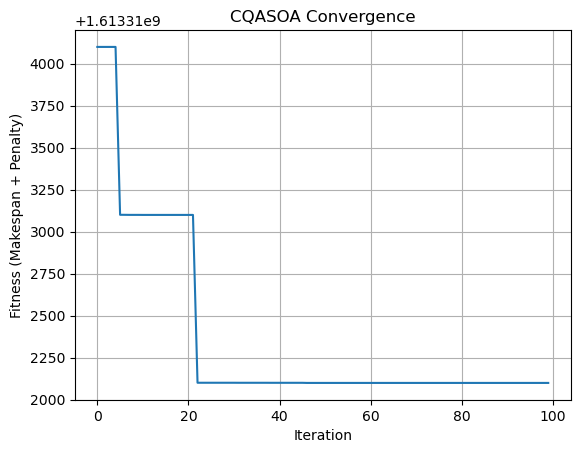


Best Solution:
1. Phân bổ tàu-bến (x):
[[1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]]

2. Phân bổ cần cẩu (q):
[[0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
 [0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]]

3. Phân bổ xe (y):
[[1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0
  0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 1 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
  1 1 0 0 0 0 0 0 1]
 [0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 1 1]
 [0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  0 

In [14]:
import numpy as np
from datetime import datetime, timedelta
import math
from copy import deepcopy
from scipy.stats import norm
import matplotlib.pyplot as plt

# ==================== DỮ LIỆU VÀ HÀM RÀNG BUỘC DÙNG CHUNG ====================
# (Từ SOA/ASOA/QSOA/CSOA, chuẩn hóa cho mọi mode)

V = 6   # Số tàu
B = 4   # Số bến
C = 23  # Số cần cẩu
Y = 45  # Số xe
M = 99999  # Penalty
TW0 = 24  # Thời gian chờ tối đa (h)
T = 24

# Dữ liệu đầu vào (bạn có thể thay đổi cho phù hợp)
VLi = [100, 200, 200, 250, 400, 400]
VDi = [5 ,8, 8, 15, 30, 30]
VCmi = [1, 1, 1, 1, 1, 1]
VCMi = [3, 3, 3, 4, 5, 5]
BLj = [400, 400, 300, 300]
BDj = [20, 20, 15 ,15]
VE = [100, 250, 250, 500, 1000, 1000]
CF0 = 0.33333
CE0 = 0.33333
E1 = 2.65
E2 = 8.959
Dij = [[1831, 2290, 2574, 3031],
       [2499, 1934, 2139, 2566],
       [2499, 1934, 2139, 2566],
       [3114, 2535, 2054, 2922],
       [3157, 2861, 2273, 2015],
       [3157, 2861, 2273, 2015]]
D = np.array(np.array(Dij) / 1000)
Tt = ["3:00:00 - 6:00:00", "15:00:00 - 18:00:00"]

# Thời gian đến và đi (giả lập)
TOi = ["30/12/2018 18:00:00", "31/12/2018 22:00:00", "02/01/2019 04:00:00", "02/01/2019 23:00:00", "03/01/2019 20:30:00", "04/01/2019 07:00:00"]
TF = ["01/01/2019 03:50:00", "03/01/2019 00:00:00", "03/01/2019 23:00:00", "04/01/2019 06:00:00", "04/01/2019 13:00:00", "05/01/2019 12:00:00"]
def convert_time_to_float(time_input):
    if isinstance(time_input, datetime):
        dt = time_input
    elif isinstance(time_input, str):
        dt = datetime.strptime(time_input, "%d/%m/%Y %H:%M:%S")
    else:
        raise TypeError("Input must be a string or datetime object.")
    epoch = datetime(1970, 1, 1)
    delta = dt - epoch
    return delta.total_seconds()
TAi_float = [convert_time_to_float(i) for i in TOi]
TF_float = [convert_time_to_float(i) for i in TF]
TA = np.array(TAi_float)
PT = np.array(np.array(TF_float) - np.array(TAi_float))
DMN = 14

# --- Các hàm ràng buộc và tiện ích dùng chung ---
def enforce_crane_constraints(q):
    # Đảm bảo mỗi tàu có số cần cẩu nằm trong [VCmi[i], VCMi[i]]
    for i in range(V):
        num_assigned = np.sum(q[i])
        # Thêm cần cẩu ít được sử dụng nhất
        if num_assigned < VCmi[i]:
            available = np.where(q[i] == 0)[0]
            # Ưu tiên cần cẩu ít được gán cho các tàu khác
            usage = np.sum(q, axis=0)
            sorted_idx = available[np.argsort(usage[available])]
            to_add = min(VCmi[i] - num_assigned, len(sorted_idx))
            if to_add > 0:
                selected = sorted_idx[:to_add]
                q[i, selected] = 1
        # Loại cần cẩu được sử dụng nhiều nhất
        elif num_assigned > VCMi[i]:
            assigned = np.where(q[i] == 1)[0]
            usage = np.sum(q, axis=0)
            sorted_idx = assigned[np.argsort(-usage[assigned])]
            to_remove = min(num_assigned - VCMi[i], len(sorted_idx))
            if to_remove > 0:
                selected = sorted_idx[:to_remove]
                q[i, selected] = 0
    return q

def schedule_cranes(q2D, VE, CF0, T):
    V_, C_ = q2D.shape
    q3D = np.zeros((V_, C_, T), dtype=int)
    for i in range(V_):
        assigned_cranes = np.where(q2D[i] == 1)[0]
        num_cranes = len(assigned_cranes)
        if num_cranes == 0:
            continue
        total_time = int(np.ceil(VE[i] * CF0))
        duration = total_time // num_cranes
        extra = total_time % num_cranes
        start_time = 0
        for j, c in enumerate(assigned_cranes):
            dur = duration + (1 if j < extra else 0)
            end_time = min(start_time + dur, T)
            q3D[i][c][start_time:end_time] = 1
            start_time = end_time
    return q3D

def crane_non_crossing_constraint(q):
    for i in range(V):
        for n in range(1, C - 1):
            for t in range(T):
                left = q[i][n - 1][t]
                center = q[i][n][t]
                right = q[i][n + 1][t]
                if left == 1 and right == 1 and center == 0:
                    return False
    return True

def check_truck_constraints(CK, M, D, A, mu_vh, sigma_vh, mu_vl, sigma_vl, CF0, CE0):
    C_, T_ = CK.shape
    V_, B_ = D.shape
    for t in range(T_):
        total_trucks = np.sum(CK[:, t])
        if total_trucks > M:
            return False
    v_h = norm.rvs(mu_vh, sigma_vh)
    v_l = norm.rvs(mu_vl, sigma_vl)
    TH = D / v_h
    TL = D / v_l
    for n in range(C_):
        for t in range(T_):
            i, j = A[n, t]
            ck = CK[n, t]
            if ck == 0:
                continue
            denominator = max(TH[i, j] + TL[i, j] + 1/CF0, ck / CE0)
            CE_n = ck / denominator
            if CE_n > CE0:
                return False
    return True

def check_vessel_berth_length_constraint(x, VLi, BLj):
    V_, B_ = x.shape
    for i in range(V_):
        for j in range(B_):
            if x[i][j] == 1 and VLi[i] > BLj[j]:
                return False
    return True

def parse_tide_intervals(Tt):
    intervals = []
    for interval in Tt:
        start_str, end_str = interval.split(" - ")
        h1, m1, s1 = map(int, start_str.split(":"))
        h2, m2, s2 = map(int, end_str.split(":"))
        start = timedelta(hours=h1, minutes=m1, seconds=s1)
        end = timedelta(hours=h2, minutes=m2, seconds=s2)
        intervals.append((start, end))
    return intervals

def is_high_tide(dt, tide_intervals):
    current_time = timedelta(hours=dt.hour, minutes=dt.minute, seconds=dt.second)
    for start, end in tide_intervals:
        if start <= current_time <= end:
            return True
    return False

def next_high_tide_time(dt, tide_intervals):
    for day_offset in range(0, 3):
        new_date = dt.date() + timedelta(days=day_offset)
        for start, _ in tide_intervals:
            candidate = datetime.combine(new_date, (datetime.min + start).time())
            if candidate > dt:
                return candidate
    return dt + timedelta(hours=6)

def float_to_datetime(float_time):
    epoch = datetime(1970, 1, 1)
    return epoch + timedelta(seconds=float_time)

def build_CK_A_from_sol(sol, V, C, T, B):
    CK = np.zeros((C, T), dtype=int)
    A = np.zeros((C, T, 2), dtype=int)
    for i in range(V):
        assigned_cranes = np.where(sol['q'][i] == 1)[0]
        assigned_trucks = np.where(sol['y'][i] == 1)[0]
        berth = np.argmax(sol['x'][i])
        for n in assigned_cranes:
            for t in range(T//2):
                CK[n, t] += max(1, len(assigned_trucks)//max(1, len(assigned_cranes)))
                A[n, t] = [i, berth]
    return CK, A

def calc_carbon_emission(sol, V, C, T, D, E1, E2):
    carbon_truck = 0
    carbon_crane = 0
    for i in range(V):
        assigned_cranes = np.where(sol['q'][i] == 1)[0]
        assigned_trucks = np.where(sol['y'][i] == 1)[0]
        berth = np.argmax(sol['x'][i])
        carbon_truck += len(assigned_trucks) * D[i, berth] * 2 * E1
        carbon_crane += len(assigned_cranes) * (T//2) * E2
    return carbon_truck, carbon_crane

# ==================== HÀM HIỂN THỊ KẾT QUẢ CHI TIẾT ====================
def show_solution_detail(best_solution):
    print("\nBest Solution:")
    print("1. Phân bổ tàu-bến (x):")
    print(best_solution['x'])
    print("\n2. Phân bổ cần cẩu (q):")
    print(best_solution['q'])
    print("\n3. Phân bổ xe (y):")
    print(best_solution['y'])
    berth_schedule = {j: 0 for j in range(B)}
    print("\nChi tiết thời gian:")
    for i in np.argsort(TA):
        berth = np.argmax(best_solution['x'][i])
        start = max(TA[i], berth_schedule[berth])
        wait = start - TA[i]
        def schedule_cranes(num_containers, num_cranes, cf0=CF0):
            if num_cranes == 0:
                return float('inf')
            return num_containers * cf0 / num_cranes
        num_cranes = int(np.sum(best_solution['q'][i])) if 'q' in best_solution else 1
        handling_time = schedule_cranes(VE[i], num_cranes)
        end = TA[i] + handling_time
        print(f"Tàu {i}: Bến {berth}, Đến {float_to_datetime(TA[i])}h, Bắt đầu {float_to_datetime(start)}h, Chờ {wait / 3600}h, Thời điểm kết thúc dự kiến: {float_to_datetime(end)}h")
        berth_schedule[berth] = start + PT[i]
    makespan = (max(berth_schedule.values()) - min(TA)) / 3600  # Đơn vị: giờ
    print(f"Makespan thực tế: {makespan:.2f} giờ")


def fitness(sol):
    berth_schedule = {j: 0 for j in range(B)}
    completion_times = []
    penalty = 0
    tide_intervals = parse_tide_intervals(Tt)
    w_carbon = 0.01
    # Ràng buộc 1: Mỗi tàu chỉ vào 1 bến
    for i in range(V):
        if np.sum(sol['x'][i]) != 1:
            penalty += 1000 * abs(np.sum(sol['x'][i]) - 1)
    # Ràng buộc 2: Mỗi cần cẩu chỉ phục vụ 1 tàu tại 1 thời điểm
    for n in range(C):
        if np.sum(sol['q'][:, n]) > 1:
            penalty += 1000 * (np.sum(sol['q'][:, n]) - 1)
    # Ràng buộc 3: Số cần cẩu cho mỗi tàu nằm trong [VCmi, VCMi]
    for i in range(V):
        total_cranes = np.sum(sol['q'][i])
        if total_cranes < VCmi[i] or total_cranes > VCMi[i]:
            penalty += 1000 * abs(total_cranes - VCmi[i])
    # Ràng buộc 4: Số xe tải cho mỗi tàu (giả sử min 1, max 10)
    for i in range(V):
        total_trucks = np.sum(sol['y'][i])
        if total_trucks < 1:
            penalty += 10000
        if total_trucks > 10:
            penalty += 1000 * (total_trucks - 10)
    if np.sum(sol['y']) > Y:
        penalty += 10000 * (np.sum(sol['y']) - Y)
    # Ràng buộc 5: Chiều dài tàu không vượt chiều dài bến
    for i in range(V):
        berth = np.argmax(sol['x'][i])
        if VLi[i] > BLj[berth]:
            penalty += 10000
    # Ràng buộc 6: Sức chứa bến
    for i in range(V):
        berth = np.argmax(sol['x'][i])
        if VDi[i] > BDj[berth]:
            penalty += 10000
    # Ràng buộc 7: Thời gian chờ không vượt quá TW0
    for i in np.argsort(TA):
        berth = np.argmax(sol['x'][i])
        assigned_cranes = np.sum(sol['q'][i])
        assigned_trucks = np.sum(sol['y'][i])
        if assigned_cranes == 0 or assigned_trucks == 0:
            penalty += 10000
            continue
        arrival_dt = float_to_datetime(TA[i])
        if VDi[i] > DMN:
            if not is_high_tide(arrival_dt, tide_intervals):
                arrival_dt = next_high_tide_time(arrival_dt, tide_intervals)
            TA_adjusted = convert_time_to_float(arrival_dt)
        else:
            TA_adjusted = TA[i]
        start_time = max(float(TA_adjusted), float(berth_schedule[berth]))
        waiting_time = start_time - TA[i]
        if waiting_time > TW0:
            penalty += 1000 * (waiting_time - TW0)
        processing_time = float((VE[i] * CF0) / assigned_cranes)
        transport_delay = D[i, berth] / (assigned_trucks + 1e-5)
        completion = float(start_time + processing_time + transport_delay)
        completion_times.append(completion)
        berth_schedule[berth] = completion
    # Ràng buộc 8: Cần cẩu không nhảy qua nhau
    q3D = schedule_cranes(sol['q'], VE, CF0, T)
    if not crane_non_crossing_constraint(q3D):
        penalty += 10000
    # Ràng buộc 9: Chiều dài tàu không vượt chiều dài bến (kiểm tra lại)
    if not check_vessel_berth_length_constraint(sol['x'], VLi, BLj):
        penalty += 10000
    # Ràng buộc 10: Truck constraint
    CK, A = build_CK_A_from_sol(sol, V, C, T, B)
    mu_vh, sigma_vh = 25, 4
    mu_vl, sigma_vl = 18, 3
    if not check_truck_constraints(CK, M, D, A, mu_vh, sigma_vh, mu_vl, sigma_vl, CF0, E2):
        penalty += 10000
    # Carbon emission
    carbon_truck, carbon_crane = calc_carbon_emission(sol, V, C, T, D, E1, E2)
    makespan = max(completion_times) if completion_times else M
    return makespan + w_carbon * (carbon_truck + carbon_crane) + penalty


# ==================== CLASS CQASOA (sẽ hoàn thiện ở các bước tiếp theo) ====================
class CQASOA:
    def __init__(self, n_seagulls=30, max_iter=100, mode='CQASOA', **kwargs):
        self.n_seagulls = n_seagulls
        self.max_iter = max_iter
        self.mode = mode
        self.kwargs = kwargs
        self.pm = kwargs.get('pm', 0.1)  # Xác suất NOT gate
        self.chaos_seed = kwargs.get('chaos_seed', None)

    def initialize(self):
        # Khởi tạo phi lượng tử và chuỗi hỗn loạn cho từng cá thể
        self.population_phi = []
        self.chaos_xs = []
        self.chaos_ys = []
        chaos_len = self.n_seagulls * (V * (B + C + Y))
        if self.chaos_seed is not None:
            np.random.seed(self.chaos_seed)
        x0, y0 = np.random.rand(), np.random.rand()
        xs, ys = self.cat_map_2d(x0, y0, chaos_len)
        idx = 0
        for _ in range(self.n_seagulls):
            phi = {
                'x': np.random.uniform(0, 2*np.pi, (V, B)),
                'q': np.random.uniform(0, 2*np.pi, (V, C)),
                'y': np.random.uniform(0, 2*np.pi, (V, Y))
            }
            self.population_phi.append(phi)
            # Lưu chuỗi hỗn loạn riêng cho từng cá thể
            self.chaos_xs.append(xs[idx:idx+B+C+Y])
            self.chaos_ys.append(ys[idx:idx+B+C+Y])
            idx += (B+C+Y)

    def cat_map_2d(self, x0, y0, n):
        xs, ys = [x0], [y0]
        for _ in range(n-1):
            x_new = (xs[-1] + ys[-1]) % 1
            y_new = (xs[-1] + 2*ys[-1]) % 1
            xs.append(x_new)
            ys.append(y_new)
        return np.array(xs), np.array(ys)

    def phi_to_solution(self, phi):
        x_bin = (np.cos(phi['x']) > 0).astype(int)
        for i in range(x_bin.shape[0]):
            if np.sum(x_bin[i]) != 1:
                idx = np.argmax(phi['x'][i])
                x_bin[i] = 0
                x_bin[i, idx] = 1
        q_bin = (np.cos(phi['q']) > 0).astype(int)
        q_bin = enforce_crane_constraints(q_bin)
        y_bin = (np.cos(phi['y']) > 0).astype(int)
        # Đảm bảo số xe hợp lệ (giống QSOA)
        y_bin = self.enforce_truck_constraints_optimized(y_bin, M)
        return {'x': x_bin, 'q': q_bin, 'y': y_bin}

    def enforce_truck_constraints_optimized(self, y, num_trucks, min_truck_per_vessel=1, max_truck_per_vessel=10):
        V_, M_ = y.shape
        # Đảm bảo mỗi tàu có số xe hợp lệ
        for i in range(V_):
            current = np.sum(y[i])
            if current < min_truck_per_vessel:
                available = np.where(np.sum(y, axis=0) == 0)[0]
                usage = np.sum(y, axis=0)
                sorted_idx = available[np.argsort(usage[available])]
                to_add = min(min_truck_per_vessel - current, len(sorted_idx))
                if to_add > 0:
                    selected = sorted_idx[:to_add]
                    y[i, selected] = 1
            if np.sum(y[i]) > max_truck_per_vessel:
                assigned = np.where(y[i] == 1)[0]
                usage = np.sum(y, axis=0)
                sorted_idx = assigned[np.argsort(-usage[assigned])]
                to_remove = min(np.sum(y[i]) - max_truck_per_vessel, len(sorted_idx))
                if to_remove > 0:
                    selected = sorted_idx[:to_remove]
                    y[i, selected] = 0
        # Đảm bảo tổng số xe không vượt quá num_trucks
        sort_idx = np.arange(V_)
        max_iter = 1000
        iter_cnt = 0
        while np.sum(y) > num_trucks and iter_cnt < max_iter:
            changed = False
            for i in reversed(sort_idx):
                assigned = np.where(y[i] == 1)[0]
                if len(assigned) > min_truck_per_vessel:
                    usage = np.sum(y, axis=0)
                    sorted_idx = assigned[np.argsort(-usage[assigned])]
                    y[i, sorted_idx[0]] = 0
                    changed = True
                    break
            if not changed:
                break
            iter_cnt += 1
        iter_cnt = 0
        while np.sum(y) < num_trucks and iter_cnt < max_iter:
            changed = False
            for i in sort_idx:
                assigned = np.where(y[i] == 0)[0]
                if np.sum(y[i]) < max_truck_per_vessel and len(assigned) > 0:
                    usage = np.sum(y, axis=0)
                    sorted_idx = assigned[np.argsort(usage[assigned])]
                    y[i, sorted_idx[0]] = 1
                    changed = True
                    break
            if not changed:
                break
            iter_cnt += 1
        return y

    def chaos_update(self, phi, chaos_x, chaos_y):
        # Xáo trộn các pha lượng tử bằng chuỗi hỗn loạn (cat map)
        phi_new = deepcopy(phi)
        # Xáo trộn từng dòng của x, q, y bằng chaos_x, chaos_y
        for key, chaos in zip(['x', 'q', 'y'], [chaos_x[:B], chaos_x[B:B+C], chaos_x[B+C:]]):
            arr = phi_new[key]
            for i in range(arr.shape[0]):
                idx = np.argsort(chaos)[:arr.shape[1]]
                arr[i] = arr[i][idx]
        return phi_new

    def quantum_update(self, phi):
        # Quantum Revolving Gate + NOT gate
        delta_phi_x = np.random.uniform(-np.pi/16, np.pi/16, phi['x'].shape)
        delta_phi_q = np.random.uniform(-np.pi/16, np.pi/16, phi['q'].shape)
        delta_phi_y = np.random.uniform(-np.pi/16, np.pi/16, phi['y'].shape)
        phi_new = {
            'x': phi['x'] + delta_phi_x,
            'q': phi['q'] + delta_phi_q,
            'y': phi['y'] + delta_phi_y
        }
        if np.random.rand() < self.pm:
            phi_new['x'] = np.pi/2 - phi_new['x']
            phi_new['q'] = np.pi/2 - phi_new['q']
            phi_new['y'] = np.pi/2 - phi_new['y']
        return phi_new

    def adaptive_update(self, t):
        fc = 2
        return fc * (np.cos(np.pi * (t / self.max_iter)) + 1) / 2

    


    def optimize(self):
        self.initialize()
        fitness_history = []
        best_phi = min(self.population_phi, key=lambda phi: fitness(self.phi_to_solution(phi)))
        best_sol = self.phi_to_solution(best_phi)
        for iter in range(self.max_iter):
            A = self.adaptive_update(iter)
            new_population_phi = []
            new_chaos_xs = []
            new_chaos_ys = []
            # Elitism: giữ lại best
            best_phi = min(self.population_phi, key=lambda phi: fitness(self.phi_to_solution(phi)))
            best_idx = next(i for i, phi in enumerate(self.population_phi) if phi is best_phi)
            new_population_phi.append(best_phi)
            new_chaos_xs.append(self.chaos_xs[best_idx])
            new_chaos_ys.append(self.chaos_ys[best_idx])
            for i, phi in enumerate(self.population_phi):
                if i == best_idx:
                    continue
                # 1. Chaos update
                phi_chaos = self.chaos_update(phi, self.chaos_xs[i], self.chaos_ys[i])
                # 2. Quantum update
                phi_quantum = self.quantum_update(phi_chaos)
                # 3. Adaptive: điều chỉnh mutation/mask (có thể dùng cho NOT gate hoặc chaos strength)
                # (Ở đây đã điều chỉnh mutation/mask qua adaptive_update, có thể mở rộng thêm)
                new_population_phi.append(phi_quantum)
                new_chaos_xs.append(self.chaos_xs[i])
                new_chaos_ys.append(self.chaos_ys[i])
            self.population_phi = new_population_phi
            self.chaos_xs = new_chaos_xs
            self.chaos_ys = new_chaos_ys
            best_phi = min(self.population_phi, key=lambda phi: fitness(self.phi_to_solution(phi)))
            best_sol = self.phi_to_solution(best_phi)
            fitness_history.append(fitness(best_sol))
            print(f"Iter {iter+1}, Best Fitness: {fitness_history[-1]}")
        plt.plot(fitness_history)
        plt.title("CQASOA Convergence")
        plt.xlabel("Iteration")
        plt.ylabel("Fitness (Makespan + Penalty)")
        plt.grid(True)
        plt.show()
        return best_sol


cqasoa = CQASOA(n_seagulls=30, max_iter=100)
best_solution = cqasoa.optimize()
show_solution_detail(best_solution)